In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

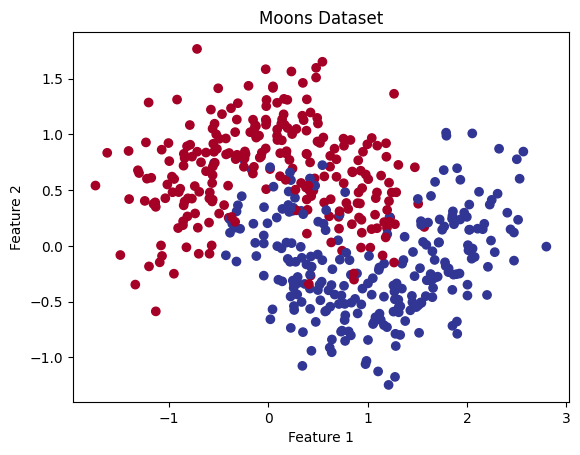

In [2]:
X ,y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Voting Classifier

In [4]:
# Selecting the models we are going to use
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Using the voting classifier
from sklearn.ensemble import VotingClassifier

In [5]:
# Initiallize models
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

# Put the models in a list
models_4 = VotingClassifier(estimators=[
    ('sgd', model_1),
    ('tree', model_2),
    ('knn', model_3)],
    voting='hard')


for model in (model_1, model_2, model_3, models_4):
    model.fit(X_train, y_train)
    print(f"Model: {model.__class__.__name__}")
    print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
    print(f"Test accuracy: {model.score(X_test, y_test):.2f}")
    print("-" * 30)

Model: SGDClassifier
Train accuracy: 0.83
Test accuracy: 0.84
------------------------------
Model: DecisionTreeClassifier
Train accuracy: 1.00
Test accuracy: 0.87
------------------------------
Model: KNeighborsClassifier
Train accuracy: 0.95
Test accuracy: 0.85
------------------------------
Model: VotingClassifier
Train accuracy: 0.97
Test accuracy: 0.89
------------------------------


# Bagging

In [6]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [7]:
# Create the Bagging model
model = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=100
)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model.score(X_test, y_test):.2f}")

Train accuracy: 0.93
Test accuracy: 0.90


In [8]:
# Let's have a look at random forest model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
# Fit the model
model.fit(X_train, y_train)
# Evaluate the model
print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model.score(X_test, y_test):.2f}")

Train accuracy: 0.95
Test accuracy: 0.91


# Boosting

In [9]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [13]:
model_5 = AdaBoostClassifier(n_estimators=100)
# Fit the model
model_5.fit(X_train, y_train)
# Evaluate the model
print(f"Train accuracy: {model_5.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model_5.score(X_test, y_test):.2f}")

Train accuracy: 0.94
Test accuracy: 0.87


# Stacking

In [15]:
from sklearn.ensemble import StackingClassifier

In [18]:
model_6 = StackingClassifier(
    estimators=[
        ('sgd', model_1),
        ('tree', model_2),
        ('knn', model_3)
    ]
)
# Fit the model
model_6.fit(X_train, y_train)
# Evaluate the model
print(f"Train accuracy: {model_6.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model_6.score(X_test, y_test):.2f}")

Train accuracy: 0.96
Test accuracy: 0.89
